In [1]:
%matplotlib inline

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import collections

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [4]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [8]:
from torchvision import datasets,transforms
data_path = '../data-unversioned/p1ch6/'
cifar10 = datasets.CIFAR10(
    data_path,train=True,download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))
    


Extracting ../data-unversioned/p1ch6/cifar-10-python.tar.gz to ../data-unversioned/p1ch6/


In [10]:
cifar10_val = datasets.CIFAR10(
    data_path,train=False,download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified


In [11]:
label_map = {0:0,2:1}
class_names = ['airplane','bird']

cifar2 = [(img,label_map[label])
         for img,label in cifar10
         if label in [0,2]]

In [12]:
cifar2_val = [(img,label_map[label])
             for img,label in cifar10_val
             if label in [0,2]]

In [14]:
connected_model = nn.Sequential(
        nn.Linear(3072,1024),
        nn.Tanh(),
        nn.Linear(1024,512),
        nn.Tanh(),
        nn.Linear(512,128),
        nn.Tanh(),
        nn.Linear(128,2))

In [16]:
numel_list = [p.numel() for p in connected_model.parameters()
             if p.requires_grad==True]


In [17]:
sum(numel_list),numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

In [18]:
first_model = nn.Sequential(nn.Linear(3072,512),
                           nn.Tanh(),
                           nn.Linear(512,2),
                           nn.LogSoftmax(dim=1))

In [19]:
numel_list = [p.numel() for p in first_model.parameters()]

In [20]:
sum(numel_list),numel_list

(1574402, [1572864, 512, 1024, 2])

In [21]:
linear = nn.Linear(3072,1024)

In [22]:
linear.weight.shape,linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))

In [23]:
conv = nn.Conv2d(3,16,kernel_size=3)
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [24]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [26]:
img,_ = cifar2[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape,output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

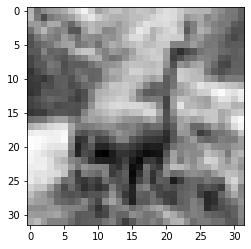

In [27]:
plt.imshow(img.mean(0),cmap='gray')
plt.show()

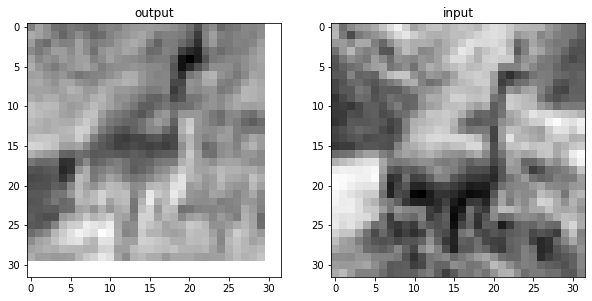

In [28]:
plt.figure(figsize=(10,4.8))
ax1=plt.subplot(1,2,1)
plt.title('output')
plt.imshow(output[0,0].detach(),cmap='gray')
plt.subplot(1,2,2,sharex=ax1,sharey=ax1)
plt.imshow(img.mean(0),cmap='gray')
plt.title('input')
plt.savefig('Ch8_F2_PyTorch.png')
plt.show()

In [29]:
conv = nn.Conv2d(3,1,kernel_size=3,padding=1)
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

In [30]:
conv = nn.Conv2d(3,1,kernel_size=3,padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0,0.0,1.0],
                                  [-1.0,0.0,1.0],
                                  [-1.0,0.0,1.0]])
    conv.bias.zero_()

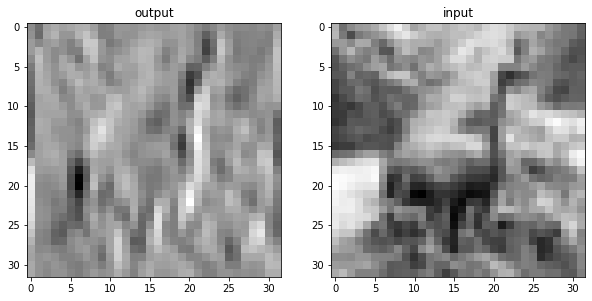

In [32]:
output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('Ch8_F5_PyTorch.png')  # bookskip
plt.show()

In [33]:
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))

img.unsqueeze(0).shape,output.shape

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

In [34]:
model = nn.Sequential(
    nn.Conv2d(3,16,kernel_size=3,padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Conv2d(16,8,kernel_size=3,padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2))

In [36]:
model = nn.Sequential(
    nn.Conv2d(3,16,kernel_size=3,padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Conv2d(16,8,kernel_size=3,padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Linear(8*8*8,32),
    nn.Linear(32,2))

In [37]:
numel_list = [p.numel() for p in model.parameters()]

In [38]:
sum(numel_list),numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [39]:
model(img.unsqueeze(0))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x8 and 512x32)

In [40]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,16,kernel_size=3,padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16,8,kernel_size=3,padding=1)
        self.act2=nn.Tanh()
        self.pool2= nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8*8*8,32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32,2)
    
    def forward(self,x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1,8*8*8)
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

In [41]:
model = Net()
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list),numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [43]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,16,kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(16,8,kernel_size=3,padding=1)
        self.fc1 = nn.Linear(8*8*8,32)
        self.fc2 = nn.Linear(32,2)
    
    def forward(self,x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)),2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)),2)
        out = out.view(-1,8*8*8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [44]:
model = Net()

model(img.unsqueeze(0))

tensor([[-0.1272, -0.1751]], grad_fn=<AddmmBackward>)

In [45]:
import datetime

def training_loop(n_epochs,optimizer,model,loss_fn,train_loader):
    for epoch in range(1,n_epochs+1):
        loss_train=0.0
        for imgs,labels in train_loader:
            outputs = model(imgs)
            loss = loss_fn(outputs,labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            loss_train += loss.item()
        if epoch == 1 or epoch %10 == 0:
            print('{} Epoch {}, Training loss {}'.format(datetime.datetime.now(),
                                                        epoch,loss_train/len(train_loader)))

In [46]:
train_loader = torch.utils.data.DataLoader(cifar2,batch_size=64,
                                          shuffle=True)

In [47]:
model = Net()
optimizer = optim.SGD(model.parameters(),lr=1e-2)
loss_fn = nn.CrossEntropyLoss()



In [48]:
training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader=train_loader,)

2022-04-22 17:50:09.568050 Epoch 1, Training loss 0.5926207023061765
2022-04-22 17:50:26.301310 Epoch 10, Training loss 0.33743973987497344
2022-04-22 17:50:45.047213 Epoch 20, Training loss 0.29991810915956074
2022-04-22 17:51:03.256755 Epoch 30, Training loss 0.2743323230819338
2022-04-22 17:51:22.023082 Epoch 40, Training loss 0.25152306253932843
2022-04-22 17:51:40.714602 Epoch 50, Training loss 0.23098804564422862
2022-04-22 17:51:59.527331 Epoch 60, Training loss 0.21379500086520128
2022-04-22 17:52:18.172114 Epoch 70, Training loss 0.19835530738731857
2022-04-22 17:52:36.899032 Epoch 80, Training loss 0.18362915639285068
2022-04-22 17:52:55.136670 Epoch 90, Training loss 0.17169497472939976
2022-04-22 17:53:13.311065 Epoch 100, Training loss 0.15935877530248302


In [49]:
train_loader = torch.utils.data.DataLoader(cifar2,batch_size=64,shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val,batch_size=64,shuffle=False)

In [52]:
def validate(model,train_loader,val_loader):
    for name,loader in [('train',train_loader),('val',val_loader)]:
        correct = 0
        total = 0
        
        with torch.no_grad():
            for imgs, labels in loader:
                outputs = model(imgs)
                _,predicted = torch.max(outputs,dim=1)
                total += labels.shape[0]
                correct += int((predicted==labels).sum())
        print("Accuracy {}:{:.2f}".format(name,correct/total))

In [53]:
validate(model,train_loader,val_loader)

Accuracy train:0.94
Accuracy val:0.90


In [54]:
torch.save(model.state_dict(),data_path +'birds_vs_airplanes.pt')

In [55]:
loaded_model = Net()
loaded_model.load_state_dict(torch.load(data_path+'birds_vs_airplanes.pt'))

<All keys matched successfully>

In [56]:
device = (torch.device('cuda') if torch.cuda.is_available()
         else torch.device('cpu'))

print(f"Training on device {device}")

Training on device cuda


In [64]:
import datetime

def training_loop(n_epochs,optimizer,model,loss_fn,train_loader):
    for epoch in range(1,n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs,labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print("{} Epoch {},Traing loss{}".format(datetime.datetime.now(),epoch,
                                                    loss_train/len(train_loader)))

In [62]:
train_loader = torch.utils.data.DataLoader(cifar2,batch_size=64,shuffle=True)

In [60]:
model = Net().to(device=device)
optimizer = optim.SGD(model.parameters(),lr=1e-2)
loss_fn = nn.CrossEntropyLoss()



In [65]:
training_loop(
    n_epochs=100,
    optimizer=optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader=train_loader,)

2022-04-22 18:33:36.260455 Epoch 1,Traing loss0.5763426732485462
2022-04-22 18:33:39.662357 Epoch 10,Traing loss0.34074041854803727
2022-04-22 18:33:43.387395 Epoch 20,Traing loss0.29956357717324217
2022-04-22 18:33:47.081515 Epoch 30,Traing loss0.2738717330299365
2022-04-22 18:33:50.764677 Epoch 40,Traing loss0.2534813156742958
2022-04-22 18:33:54.471768 Epoch 50,Traing loss0.2342822767177205
2022-04-22 18:33:58.147937 Epoch 60,Traing loss0.21368793704232592
2022-04-22 18:34:01.842064 Epoch 70,Traing loss0.19806979131546748
2022-04-22 18:34:05.514243 Epoch 80,Traing loss0.18406859875484638
2022-04-22 18:34:09.198390 Epoch 90,Traing loss0.16847929163913059
2022-04-22 18:34:12.862591 Epoch 100,Traing loss0.15460963523501803


In [66]:
loaded_model = Net().to(device=device)

In [68]:
loaded_model.load_state_dict(torch.load(data_path+'birds_vs_airplanes.pt',map_location=device))

<All keys matched successfully>

In [69]:
class NetWidth(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,32,kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(32,16,kernel_size=3,padding=1)
        self.fc1 = nn.Linear(16*8*8,32)
        self.fc2 = nn.Linear(32,2)
    
    def forward(self,x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)),2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)),2)
        out = out.view(-1,16*8*8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [70]:
class NetWidth(nn.Module):
    def __init__(self,n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3,n_chans1,kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(n_chans1,n_chans//2,kernel_size=3,padding=1)
        self.fc1 = nn.Linear(8*8*n_chans1 // 2,32)
        self.fc2 = nn.Linear(32,2)
    
    def forward(self,x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)),2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)),2)
        out = out.view(-1,8*8*self.n_chans1//2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [71]:
sum(p.numel() for p in model.parameters())

18090

In [72]:
def training_loop_12reg(n_epochs,optimizer,model,loss_fn,train_loader):
    for epoch in range(1,n_epochs+1):
        loss_train = 0.0
        for imgs,labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss= loss_fn(outputs,labels)
            
            l2_lambda= 0.001
            l2_norm = sum(p.pow(2.0).sum()
                         for p in model.parameters())
            
            loss = loss + l2_lambda * l2_norm
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            loss_train += loss.item()
            
        if epoch == 1 or epoch %10 == 0:
            print('{} Epoch {},Training loss{}'.format(
            datetime.datetime.now(),epoch,loss_train/len(train_loader)))

In [73]:
class NetDropout(nn.Module):
    def __init__(self,n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3,n_chans1,kernel_size=3,padding=1)
        self.conv1_dropout = nn.Dropout2d(p=0.4)
        self.conv2 = nn.Conv2d(n_chans1,n_chan1//2,kernel_size=3,padding=1)
        self.conv2_dropout = nn.Dropout2d(p=0.4)
        self.fc1 = nn.Linear(8*8*n_chans1 //2,32)
        self.fc2 = nn.Linear(32,2)
    
    def forward(self,x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)),2)
        out = self.conv1_dropout(out)
        out = F.max_pool2d(torch.tanh(self.conv2(out)),2)
        out = self.conv2_dropout(out)
        out = out.view(-1,8*8*self.n_chans1 //2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [74]:
class NetBatchNorm(nn.Module):
    def __init__(self,n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3,n_chans1,kernel_size=3,padding=1)
        self.conv1_batchnorm = nn.BatchNorm2d(num_features=n_chans1)
        self.conv2 = nn.Conv2d(n_chans1,n_chans1//2,kernel_size=3,padding=1)
        self.conv2_batchnorm = nn.BatchNorm2d(num_features=n_chans1 //2)
        self.fc1 = nn.Linear(8*8*n_chans1 //2, 32)
        self.fc2 = nn.Linear(32,2)
    
    def forward(self,x):
        out = self.conv1_batchnorm(self.conv1(x))
        out = F.max_pool2d(torch.tanh(out),2)
        out = self.conv2_batchnorm(self.conv2(out))
        out = F.max_pool2d(torch.tanh(out),2)
        out = out.view(-1,8*8*self.n_chans1//2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [75]:
class NetDepth(nn.Module):
    def __init__(self,n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3,n_chans1,kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(n_chans1,n_chans1//2,kernel_size=3,padding=1)
        self.conv3 = nn.Conv2d(n_chans1//2,n_chans1//2,kernel_size=3,padding=1)
        self.fc1 = nn.Linear(4*4*n_chans1//2,32)
        self.fc2 = nn.Linear(32,2)
        
    def forward(self,x):
        out = F.max_pool2d(torch.relu(self.conv1(x)),2)
        out = F.max_pool2d(torch.relu(self.conv2(out)),2)
        out = F.max_pool2d(torch.relu(slef.conv3(out)),2)
        
        out = out.view(-1,4*4*self.n_chans1//2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [76]:
class NetRes(nn.Module):
    def __init__(self,n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3,n_chans1,kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(n_chans1,n_chans1//2,kernel_size=3,padding=1)
        self.conv3 = nn.Conv2d(n_chan1//2,n_chans1//2,kernel_size=3,padding=1)
        
        self.fc1 = nn.Linear(4*4*n_chans1//2,32)
        self.fc2 = nn.Linear(32,2)
    
    def forward(self,x):
        out = F.max_pool2d(torch.relu(self.conv1(x)),2)
        out = F.max_pool2d(torch.relu(self.conv2(out)),2)
        out1 = out
        out = F.max_pool2d(torch.relu(self.conv3(out))+out1,2)
        out = out.view(-1,4*4*self.n_chans1//2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [77]:
class ResBlock(nn.Module):
    def __init__(self,n_chans):
        super(Resblock,self).__init__()
        self.conv=nn.Conv2d(n_chans,n_chans,kernel_size=3,
                           padding=1,bias=False)
        self.batch_norm = nn.BatchNorm2d(num_features=n_chans)
        torch.nn.init.kaiming_normal_(self.conv.weight,
                                     nonlinearity='relu')
        torch.nn.init.constant_(self.batch_norm.weight,0.5)
        torch.nn.init.zeros_(self.batch_norm.bias)
    def forward(self,x):
        out = self.conv(x)
        out = self.batch_norm(out)
        out = torch.relu(out)
        return out+x

In [78]:
class NetResDeep(nn.Module):
    def __init__(self,n_chans1=32,n_blocks=10):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3,n_chans1,kernel_size=3,padding=1)
        self.resblocks = nn.Sequential(*(n_blocks*[ResBlock(n_chans=n_chans1)]))
        self.fc1 = nn.Linear(8*8*n_chans1,32)
        self.fc2 = nn.Linear(32,2)
    
    def forward(self,x):
        out = F.max_pool2d(torch.relu(self.conv1(x)),2)
        out = self.resblocks(out)
        out = F.max_pool2d(out,2)
        out = out.view(-1,8*8*self.n_chans1)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out